In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
import pysal as ps
from spacv.grid_builder import *
from spacv.spacv import cross_val_score
import spacv
from sklearn.neighbors import KDTree

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.7.2dev-CAPI-1.11.2 0) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df = gpd.read_file('/opt/conda/lib/python3.7/site-packages/libpysal/examples/baltim/baltim.shp')

XYs = df['geometry']
X = df[['NROOM', 'DWELL', 'NBATH']]
y = df['PATIO']

model = LinearRegression(fit_intercept=True)

In [16]:
cv = spacv.HBLOCK(buffer_radius=75, method='unique')

In [17]:
scores = cross_val_score(model, XYs, X, y, cv, mean_squared_error)

In [18]:
np.sqrt(
    np.mean(scores)
)

0.2586419666585269

In [140]:
grid = construct_blocks(XYs, 
                      tiles_x = 5, 
                      tiles_y = 5, 
                      method = 'random', n_groups=5)

In [67]:
class UserDefinedSCV(BaseSpatialCV):
    
    def __init__(
        self,
        customshape,
        buffer_radius = None
    ):
        self.customshape = customshape
        self.buffer_radius = buffer_radius
        
        
    def _iter_test_indices(self, X):
        
        customshape = self.customshape
        
        for grid_id in customshape:

            yield test_points, hblock_train_exclude


In [68]:
UserDefinedSCV(user_supplied)

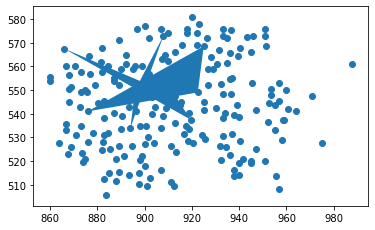

In [69]:
f,ax=plt.subplots(1)
user_supplied.plot(ax=ax)
df.plot(ax=ax)

In [31]:
a = df.sample(3).geometry.unary_union.convex_hull

b = df.sample(3).geometry.unary_union.convex_hull

c = df.sample(3).geometry.unary_union.convex_hull

In [32]:
from shapely.geometry import MultiPolygon

In [58]:
user_supplied = gpd.GeoDataFrame({'geometry':MultiPolygon([a,b,c])})

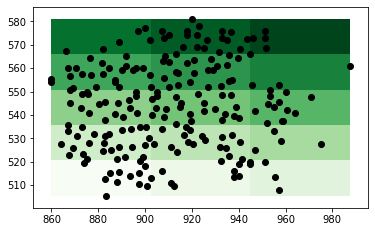

In [5]:
f, ax = plt.subplots(1)
blocks(df, tiles_x=3, tiles_y=5, method='unique').plot(column='grid_id', cmap='Greens',ax=ax)
df.plot(ax=ax, color='black')

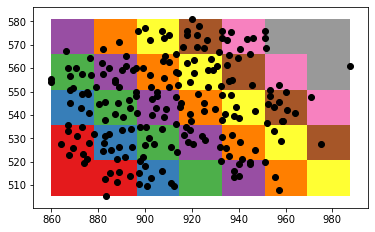

In [12]:
f, ax = plt.subplots(1)
blocks(df, method='systematic', tiles_x=7, tiles_y=5, direction='anti').plot(column='grid_id', cmap='Set1', ax=ax)
df.plot(ax=ax, color='black')

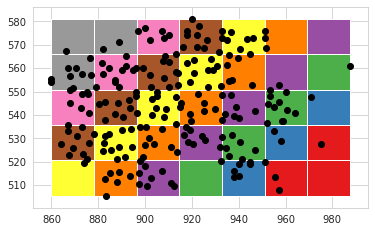

In [1310]:
f, ax = plt.subplots(1)
blocks(df, method='systematic', tiles_x=7, tiles_y=5, direction='diagonal').plot(column='grid_id', cmap='Set1', ax=ax)
df.plot(ax=ax, color='black')

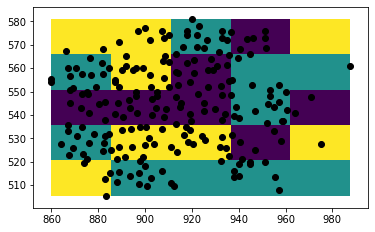

In [7]:
f, ax = plt.subplots(1)
blocks(df, method='randomized', tiles_x=5, tiles_y=5, n_groups=3).plot(column='grid_id', ax=ax)
df.plot(ax=ax, color='black')